## Assumptions of K-means

1. **Cluster number is $k$:** K-means assumes that the correct cluster number is $k$. Because you provide the value of $k$ to k-means, you need to determine the best value. However, most of the time, determining $k$ is not trivial, and you need to run k-means with several $k$ values and choose the one that makes the most sense to you. In the next lesson, you'll explore how to measure the performances of clustering algorithms. Using those techniques, you should choose the best $k$ among the alternatives.
2. **Clusters are isotropic:** K-means assumes that the underlying "true" clusters are radially symmetrical (isotropic), meaning that they are uniform in all directions and the edges curve outward. If this assumption fails, k-means would come up with unuseful clusters. However, there are other clustering methods that can handle non-isotropic clustering structures. 
3. **Similar variance:** K-means also assumes all clusters have similar variance.

## Performance considerations

The average complexity of the k-means algorithm is $O(k n T)$, where $n$ is the number of observations and $T$ is the number of iterations. Hence, high-dimensional data tends to make k-means run more slowly because it is more computationally demanding to measure the distance between each data point and the mean in a higher-dimensional space. That being said, in practice, k-means is one of the fastest clustering algorithms available. 

A common practice when you have too many dimensions is to run a PCA on the data first to reduce dimensionality, and then search for clusters in the reduced data. When the number of observations is high (100,000 or above) and you have limited computational power or time, another option is to use `MiniBatchKMeans` in scikit-learn. This algorithm randomly samples subsets of the training data in each iteration. The loop steps are similar to those in the original:

1. Assign the samples to their nearest centroids.
2. Update the centroids based on the streaming average of all of the samples that have been assigned to the centroid so far.

The solution that you get will be a little worse than regular k-means, but the algorithm runs drastically faster.

Scikit-learn has a module called `cluster` that includes several clustering algorithms, including k-means.

### Synthetic data

K-means has an impressive ability to discover *isotropic* (circular) clusters. You can see this by running k-means on some randomly generated data. You'll randomly sample two normally distributed datasets with different means, and then cluster them using k-means. Note that, although the means of the two variables are different, you make their variance the same. This is because k-means works best if the variances in the clusters are the same.


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [2]:
## two clusters here randomly sample from normal distribution and use this to define 
## two variables called cluster_1 and cluster_2. Standardize them using StandardScaler
## from sklearn.preprocessing:

cluster_1x = np.random.normal(10,5,500)
cluster_1y = np.random.normal(20,5,500)
cluster_1 = np.concatenate([cluster_1x.reshape(-1,1),cluster_1y.reshape(-1,1)], axis=1)

cluster_2x = np.random.normal(30,5,500)
cluster_2y = np.random.normal(20,5,500)
cluster_2 = np.concatenate([cluster_2x.reshape(-1,1),cluster_2y.reshape(-1,1)], axis=1)

all_data = np.concatenate([cluster_1,cluster_2],axis=0)

scaler = StandardScaler()
all_data = scaler.fit_transform(all_data)

20.9 ms ± 2.96 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


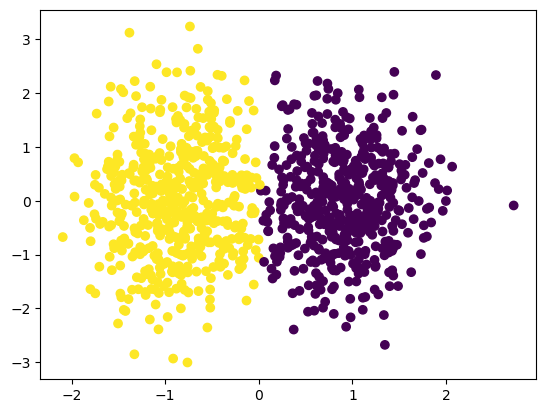

In [8]:
k_means = KMeans(n_clusters=2, random_state=42)
%timeit k_means.fit(all_data)
y_pred = k_means.predict(all_data)

## Plot the solution.
## col 0 and col 1
plt.scatter(all_data[:,0], all_data[:,1], c=y_pred)
plt.show()